In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [32]:
x = pd.read_csv('data/x.csv', index_col=0)['0']
y = pd.read_csv('data/y.csv', index_col=0)['0']

In [3]:
x.head()

0    1.462108
1    1.133769
2   -2.301539
3    1.744812
4    0.042214
Name: 0, dtype: float64

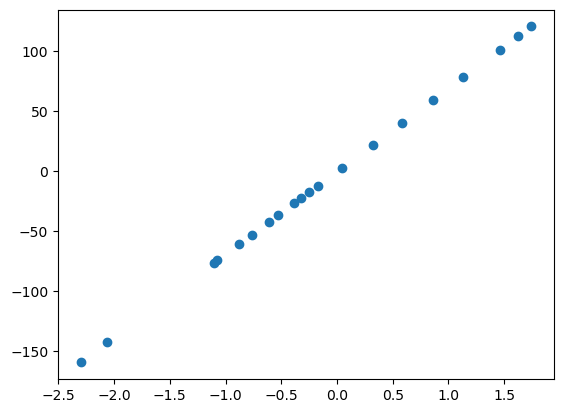

In [4]:
plt.figure()
plt.scatter(x, y)
plt.show()

In [45]:
class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 0
        self.b1 = 0
    def predict(self, X):
        return self.b0 + self.b1 * X
    def error(self, X, Y):
        return sum(((self.predict(X) - Y)**2) / (2 * len(X)))
    def fit(self, X, Y, alpha=0.001, accuracy=0.01, max_steps=5000):
        steps, errors = [], []
        step = 0        
        for _ in range(10000):
            dJ0 = sum(self.predict(X) - Y) /len(X)
            dJ1 = sum((self.predict(X) - Y) * X) /len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1    
            new_err = hyp.error(X, Y)
            step += 1            
            steps.append(step)
            errors.append(new_err)
        return steps, errors
    


1. Задания для самостоятельного выполнения

In [3]:
x = pd.read_csv('data/x.csv', index_col=0)['0']
y = pd.read_csv('data/y.csv', index_col=0)['0']

In [5]:
class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 0
        self.b1 = 0
    def predict(self, X):
        return self.b0 + self.b1 * X
    def error(self, X, Y):
        return sum(((self.predict(X) - Y)**2) / (2 * len(X)))
    def fit(self, X, Y, alpha=0.001, accuracy=0.01, max_steps=5000):
        steps, errors = [], []
        step = 0        
        for _ in range(10000):
            dJ0 = sum(self.predict(X) - Y) /len(X)
            dJ1 = sum((self.predict(X) - Y) * X) /len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1    
            new_err = hyp.error(X, Y)
            step += 1            
            steps.append(step)
            errors.append(new_err)
        return steps, errors
    

1. Проверьте работу модели с разными начальными значениями параметров. Убедитесь, что модель всегда сходится к оптимуму.

In [6]:
hyp = Model()
steps, errors = hyp.fit(x, y, alpha=0.001, accuracy=0.00005, max_steps=500)
J = hyp.error(x, y)
print("error after gradient descent:", J)

error after gradient descent: 2.776975306057215e-06


In [7]:
steps, errors = hyp.fit(x, y, alpha=0.001, accuracy=0.00000001, max_steps=1000)
J = hyp.error(x, y)
print("error after gradient descent:", J)

error after gradient descent: 1.9322688565990425e-14


In [8]:
steps, errors = hyp.fit(x, y, alpha=0.001, accuracy=100, max_steps=50000)
J = hyp.error(x, y)
print("error after gradient descent:", J)

error after gradient descent: 1.3816175229473123e-22


In [14]:
hyp1 = Model()
hyp2 = Model()
hyp3 = Model()
hyp1.b0 = 1
hyp2.b0 = -1
hyp3.b1 = 2

In [31]:
steps1, errors1 = hyp1.fit(x, y, alpha=0.01)
steps2, errors2 = hyp2.fit(x, y, alpha=0.0001)
steps3, errors3 = hyp3.fit(x, y)
J1 = hyp1.error(x, y)
J2 = hyp2.error(x, y)
J3 = hyp3.error(x, y)
print("error after gradient descent:", J1)
print("error after gradient descent:", J2)
print("error after gradient descent:", J3)

error after gradient descent: 2.0059226588479422e-25
error after gradient descent: 3.1454993633281395e-15
error after gradient descent: 1.3153454573857332e-22


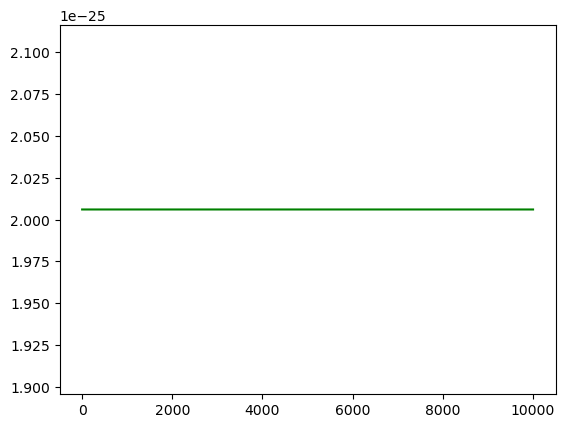

In [33]:
plt.plot(steps2, errors2, 'g', label='hyp2')
plt.show()


In [29]:
hyp = Model()
steps, errors = hyp.fit(x, y, alpha=0.01)
J = hyp.error(x, y)
print("error after gradient descent:", J)

error after gradient descent: 2.006036254818294e-25


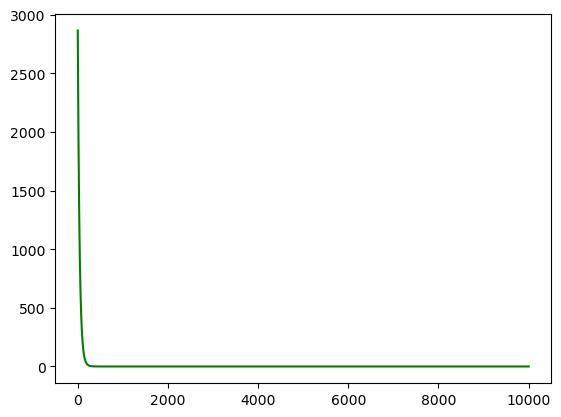

In [30]:
plt.figure()
plt.plot(steps, errors, 'g')
plt.show()


error after gradient descent: 253.47092542308437


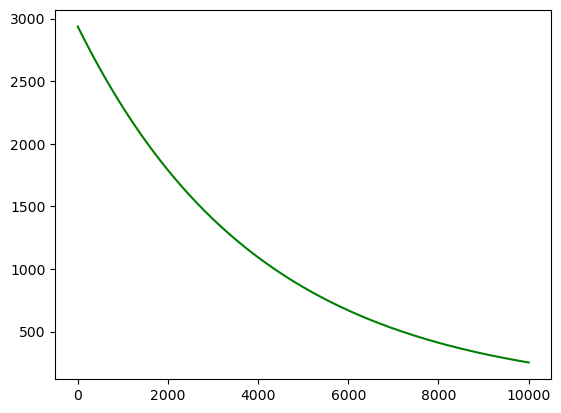

In [27]:
hyp = Model()
steps, errors = hyp.fit(x, y, alpha=0.0001)
J = hyp.error(x, y)
print("error after gradient descent:", J)
plt.figure()
plt.plot(steps, errors, 'g')
plt.show()

2. Проверьте работу модели с другими значениями скорости обучения. Найдите значение, при котором градиентный спуск расходится.

error after gradient descent with lr=-0.2: nan


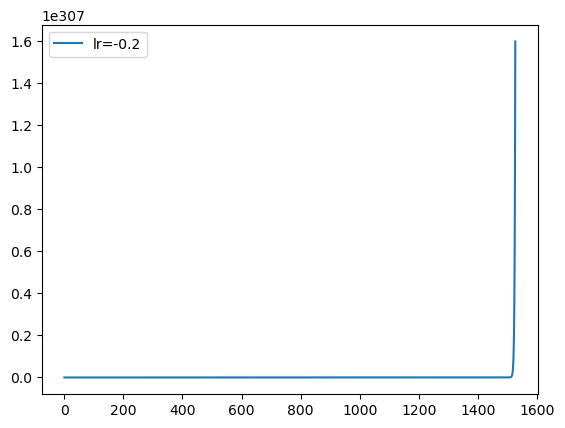

In [73]:
learning_rates = [-0.2]

for lr in learning_rates:
    hyp = Model()
    steps, errors = hyp.fit(x, y, alpha=lr)
    J = hyp.error(x, y)
    print("error after gradient descent with lr={}: {}".format(lr, J))
    plt.plot(steps, errors, label="lr={}".format(lr))

plt.legend()
plt.show()

error after gradient descent: 2.006036254818294e-25


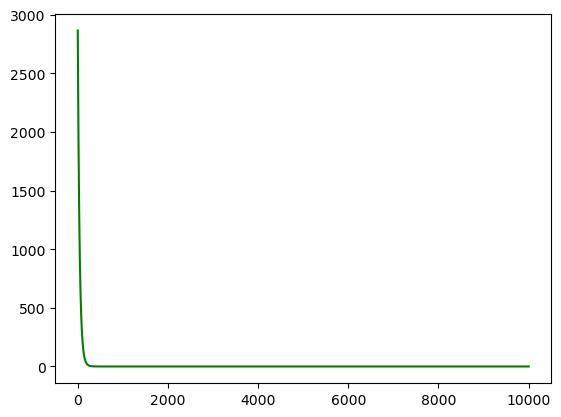

In [41]:
hyp = Model()
steps, errors = hyp.fit(x, y, alpha=0.01)
J = hyp.error(x, y)
print("error after gradient descent:", J)
plt.figure()
plt.plot(steps, errors, 'g')
plt.show()

In [42]:
hyp = Model()
steps, errors = hyp.fit(x, y, alpha=0.0001)
J = hyp.error(x, y)
print("error after gradient descent:", J)

error after gradient descent: 253.47092542308437


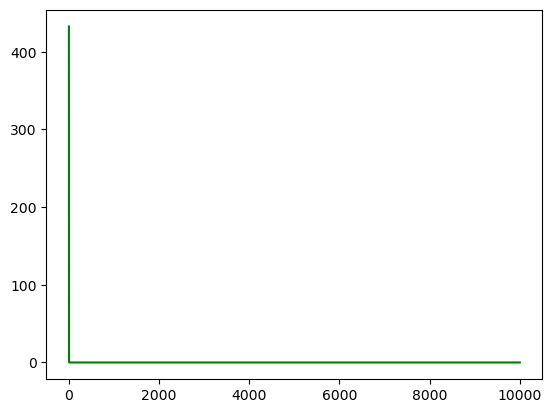

In [65]:

plt.figure()
plt.plot(steps, errors, 'g')
plt.show()

3. Модифицируйте код модели таким образом, чтобы он корректно работал как с Series, так и с DataFrame. При этом, конечно, датафрейм не должен содержать "лишних" столбцов.

In [24]:
x = pd.Series('data/x.csv')
y = pd.Series('data/y.csv')

In [25]:
print(type(x))
print(type(y))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [162]:
x = pd.read_csv('data/x.csv', index_col=0)['0']
y = pd.read_csv('data/y.csv', index_col=0)['0']

In [26]:
class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 0
        self.b1 = 0
    def predict(self, X):
        if isinstance(X, pd.Series):
            X = X.to_frame()
        return self.b0 + self.b1 * X


    def error(self, X, Y):
        if isinstance(X, pd.Series):
            X = X.to_frame()
        if isinstance(Y, pd.Series):
            Y = Y.to_frame()
        return sum(((self.predict(X) - Y)**2) / (2 * len(X)))

    
    def fit(self, X, Y, alpha=0.001, accuracy=0.01, max_steps=5000):
        if isinstance(X, pd.Series):
            X = X.to_frame()
        steps, errors = [], []
        step = 0        
        for _ in range(10000):
            dJ0 = sum(self.predict(X) - Y) /len(X)
            dJ1 = sum((self.predict(X) - Y) * X) /len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1    
            new_err = hyp.error(X, Y)
            step += 1            
            steps.append(step)
            errors.append(new_err)
        return steps, errors



4. Модифицируйте алгоритм градиентного спука таким образом, чтобы он останавливаля, если ошибка перестает снижаться. Для этого сравнивайте, на сколько понизилась ошибка на каждом шаге и если это снижение меньше некоторой заранее заданной очень маленькой величины - выходите из цикла. Эту величину можно взять одну миллионную, например.

In [33]:
class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 0
        self.b1 = 0
    def predict(self, X):
        return self.b0 + self.b1 * X
    def error(self, X, Y):
        return sum(((self.predict(X) - Y)**2) / (2 * len(X)))
    def fit(self, X, Y, alpha=0.001, accuracy=0.01, max_steps=5000):
        steps, errors = [], []
        step = 0
        old_err = self.error(X, Y)
        new_err = old_err - 2 * accuracy

        
        while (abs(old_err - new_err) >= accuracy) and (step <= max_steps):
            dJ0 = sum(self.predict(X) - Y) / len(X)
            dJ1 = sum((self.predict(X) - Y) * X) / len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1
            old_err = new_err
            new_err = hyp.error(X, Y)
            step += 1
            steps.append(step)
            errors.append(new_err)

        return steps, errors


error after gradient descent with lr=0.1: 0.035220572400342896
Step 1: error diff = 523.3585281730327
Step 2: error diff = 400.7494098797042
Step 3: error diff = 307.0643246372266
Step 4: error diff = 235.44314562804618
Step 5: error diff = 180.659546398354
Step 6: error diff = 138.73067198567753
Step 7: error diff = 106.62028480570848
Step 8: error diff = 82.01296018872063
Step 9: error diff = 63.14229358019165
Step 10: error diff = 48.660173112223504
Step 11: error diff = 37.53727925546957
Step 12: error diff = 28.98733425655864
Step 13: error diff = 22.409417753495447
Step 14: error diff = 17.344027784424895
Step 15: error diff = 13.439601967677007
Step 16: error diff = 10.427000606091667
Step 17: error diff = 8.100051600763425
Step 18: error diff = 6.300711721602067
Step 19: error diff = 4.907744435265119
Step 20: error diff = 3.8280773100659324
Step 21: error diff = 2.990201885197145
Step 22: error diff = 2.3391309126193427
Step 23: error diff = 1.8325435298779418
Step 24: error d

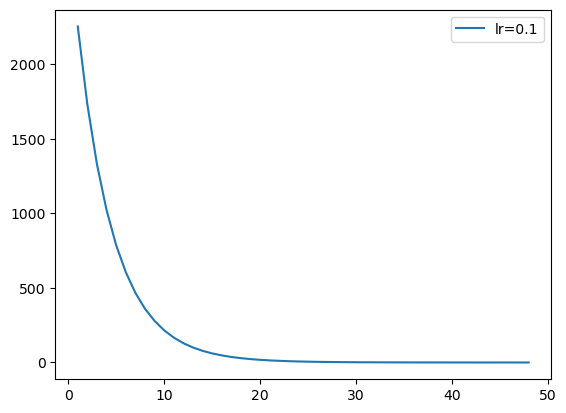

In [34]:
learning_rates = [0.1]

for lr in learning_rates:
    hyp = Model()
    steps, errors = hyp.fit(x, y, alpha=lr)
    J = hyp.error(x, y)
    print("error after gradient descent with lr={}: {}".format(lr, J))
    plt.plot(steps, errors, label="lr={}".format(lr))
    
    # Вывод текущей ошибки на каждом шаге
    for i in range(len(errors)):
        if i > 0:
            error_diff = errors[i-1] - errors[i]
            if error_diff < 0.000000000000000000001:
                break
            print("Step {}: error diff = {}".format(i, error_diff))
    
plt.legend()
plt.show()


5. Убедитесь, что алгоритм градиентного спуска завершается всегда - либо если ошибка перестает существенно меняться, либо при достижении максимального количества шагов.

смотри выше(для себя)

6.Реализуйте механизм адаптивной скорости обучения. Чтобы не задавать вручную параметр alpha можно отслеживать, увеличивается ли ошибка после первого шага градиентного спуска. В начале задаем скорость обучения близкой к 1. Если ошибка после одного шага увеличивается - скорость обучения надо уменьшить (например, в 2 раза). Если не увеличивается - скорость обучения можно не трогать. Еще подумайте, как после уменьшения скорости перезапускать градиентный спуск заново.

In [8]:
class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 0
        self.b1 = 0
    def predict(self, X):
        return self.b0 + self.b1 * X
    def error(self, X, Y):
        return sum(((self.predict(X) - Y)**2) / (2 * len(X)))
    def fit(self, X, Y, alpha=0.001, accuracy=0.01, max_steps=5000):
        
        steps, errors = [], []
        step = 0
        new_err = self.error(X, Y)
        old_err = new_err
        while step < max_steps and abs(new_err - old_err) > accuracy:
            dJ0 = sum(self.predict(X) - Y) / len(X)
            dJ1 = sum((self.predict(X) - Y) * X) / len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1
            old_err = new_err
            new_err = hyp.error(X, Y)
            if new_err > old_err:
                alpha /= 2
                self.b0 += alpha * dJ0
                self.b1 += alpha * dJ1
                old_err = hyp.error(X, Y)
            else:
                continue
            step += 1
            steps.append(step)
            errors.append(new_err)
   

        
        return steps, errors


error after gradient descent with lr=2: 2937.6446095153397
error after gradient descent with lr=1: 2937.6446095153397
error after gradient descent with lr=1.0: 2937.6446095153397
error after gradient descent with lr=0.1: 2937.6446095153397
error after gradient descent with lr=2.0: 2937.6446095153397
error after gradient descent with lr=0.2: 2937.6446095153397


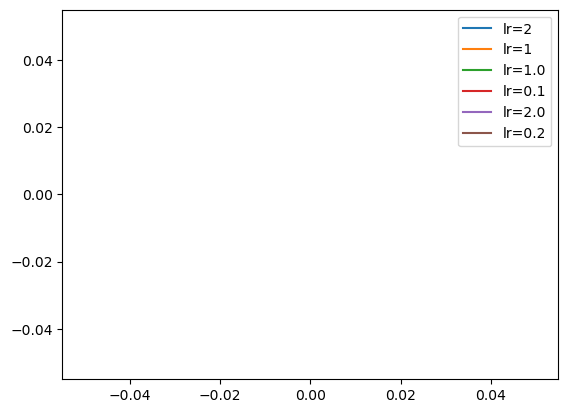

In [9]:
learning_rates = [2, 1, 1.0, 0.1, 2.0, 0.2]

for lr in learning_rates:
    hyp = Model()
    steps, errors = hyp.fit(x, y, alpha=lr, max_steps=100000)
    J = hyp.error(x, y)
    print("error after gradient descent with lr={}: {}".format(lr, J))
    plt.plot(steps, errors, label="lr={}".format(lr))
    # Вывод текущей ошибки на каждом шаге
    for i in range(len(errors)):
        if i > 0:
            error_diff = errors[i-1] - errors[i]
            if error_diff < 0.000000000000000000001:
                break
            print("Step {}: error diff = {}".format(i, error_diff))

plt.legend()
plt.show()




7. Добавьте к классу модели метод рисования графиков. Сделайте так, чтобы он был независим от масштаба переданных данных.

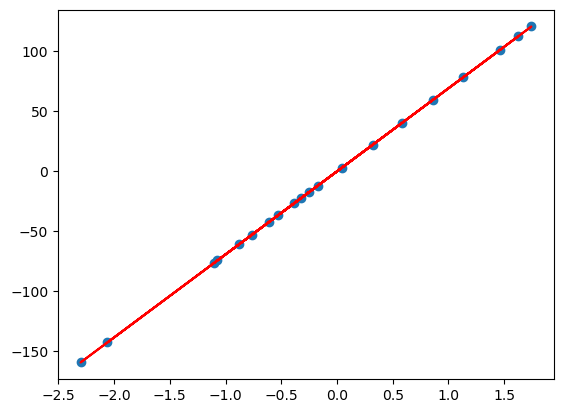

In [61]:
hyp = Model()
hyp.grafik(x,y)